
# SPATIO-TEMPORAL CRIME PREDICTION USING DYNAMIC MODE DECOMPOSITION (DMD) AND CONVOLUTIONAL NEURAL NETWORK LONG-SHORT TERM MEMORY (CNN-LSTM) 
## Adrian Joseph Albino, Julian Ernest Camello
### This notebook documents the implementation of our thesis paper

![Conceptual Framework](conceptual_framework.png)

# Dataset
[SF Incident Report](https://www.kaggle.com/datasets/vivovinco/san-francisco-incident-reports-2018present)


In [1]:
import pandas as pd
    
file_path = 'Police_Department_Incident_Reports__2018_to_Present.csv'
df = pd.read_csv(file_path)
df.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2023/03/13 11:41:00 PM,2023/03/13,23:41,2023,Monday,2023/03/13 11:41:00 PM,125373607041,1253736,230167874,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023/03/01 05:02:00 AM,2023/03/01,05:02,2023,Wednesday,2023/03/11 03:40:00 PM,125379506374,1253795,236046151,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023/03/13 01:16:00 PM,2023/03/13,13:16,2023,Monday,2023/03/13 01:17:00 PM,125357107041,1253571,220343896,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023/03/13 10:59:00 AM,2023/03/13,10:59,2023,Monday,2023/03/13 11:00:00 AM,125355107041,1253551,230174885,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023/03/14 06:44:00 PM,2023/03/14,18:44,2023,Tuesday,2023/03/14 06:45:00 PM,125402407041,1254024,230176728,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

date_format = '%Y/%m/%d'
time_format = '%H:%M:%S'

df['Incident Date'] = pd.to_datetime(df['Incident Date'], format=date_format)

In [3]:
df.describe()

,Incident Date,Incident Year,Row ID,Incident ID,Incident Number,CAD Number,Incident Code,CNN,Supervisor District,Supervisor District 2012,Latitude,Longitude,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
count,796456,796456.000000,7.964560e+05,7.964560e+05,7.964560e+05,6.169580e+05,796456.000000,7.531860e+05,752759.000000,753053.000000,753186.000000,753186.000000,737322.000000,8508.0,102789.0,102088.0,165549.000000,0.0,753053.000000,752332.000000
mean,2020-11-13 17:55:22.181263360,2020.375992,9.804231e+10,9.804228e+05,2.053628e+08,2.063074e+08,24521.596955,2.531505e+07,5.932608,5.975962,37.769085,-122.424015,53.093690,1.0,1.0,1.0,2.330579,NaN,6.704702,4.920950
min,2018-01-01 00:00:00,2018.000000,6.186871e+10,6.186870e+05,0.000000e+00,1.000000e+00,1000.000000,2.001300e+07,1.000000,1.000000,37.707988,-122.511295,1.000000,1.0,1.0,1.0,1.000000,NaN,1.000000,1.000000
25%,2019-05-04 00:00:00,2019.000000,8.009118e+10,8.009118e+05,1.904088e+08,1.913818e+08,6244.000000,2.395300e+07,3.000000,3.000000,37.754287,-122.434602,23.000000,1.0,1.0,1.0,1.000000,NaN,3.000000,3.000000
50%,2020-11-07 00:00:00,2020.000000,9.802335e+10,9.802330e+05,2.060322e+08,2.032705e+08,7041.000000,2.492500e+07,6.000000,6.000000,37.775787,-122.417779,50.000000,1.0,1.0,1.0,3.000000,NaN,7.000000,5.000000
75%,2022-06-01 00:00:00,2022.000000,1.160502e+11,1.160502e+06,2.204562e+08,2.215826e+08,51040.000000,2.647500e+07,9.000000,8.000000,37.785759,-122.407337,86.000000,1.0,1.0,1.0,3.000000,NaN,10.000000,7.000000
max,2023-11-24 00:00:00,2023.000000,1.339893e+11,1.339893e+06,9.901103e+08,1.000000e+09,75030.000000,5.420300e+07,11.000000,11.000000,37.829991,-122.363743,117.000000,1.0,1.0,1.0,5.000000,NaN,11.000000,10.000000
std,NaN,1.722402,2.075918e+10,2.075918e+05,1.770246e+07,2.565641e+07,25634.883160,3.099804e+06,2.837400,2.807455,0.024530,0.026397,32.632155,0.0,0.0,0.0,1.371455,NaN,3.333286,2.751903


In [4]:
df.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2023/03/13 11:41:00 PM,2023-03-13,23:41,2023,Monday,2023/03/13 11:41:00 PM,125373607041,1253736,230167874,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023/03/01 05:02:00 AM,2023-03-01,05:02,2023,Wednesday,2023/03/11 03:40:00 PM,125379506374,1253795,236046151,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023/03/13 01:16:00 PM,2023-03-13,13:16,2023,Monday,2023/03/13 01:17:00 PM,125357107041,1253571,220343896,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023/03/13 10:59:00 AM,2023-03-13,10:59,2023,Monday,2023/03/13 11:00:00 AM,125355107041,1253551,230174885,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023/03/14 06:44:00 PM,2023-03-14,18:44,2023,Tuesday,2023/03/14 06:45:00 PM,125402407041,1254024,230176728,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


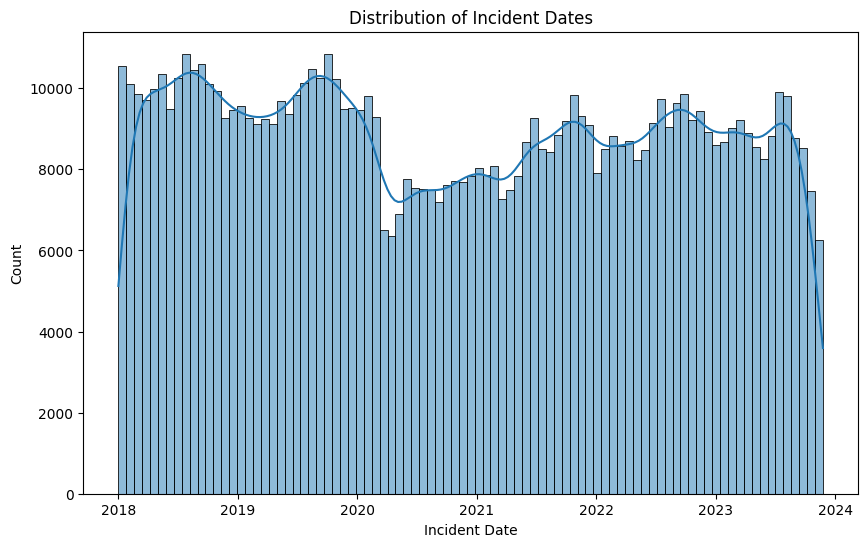

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Incident Date'], kde=True)
plt.title('Distribution of Incident Dates')
plt.show()

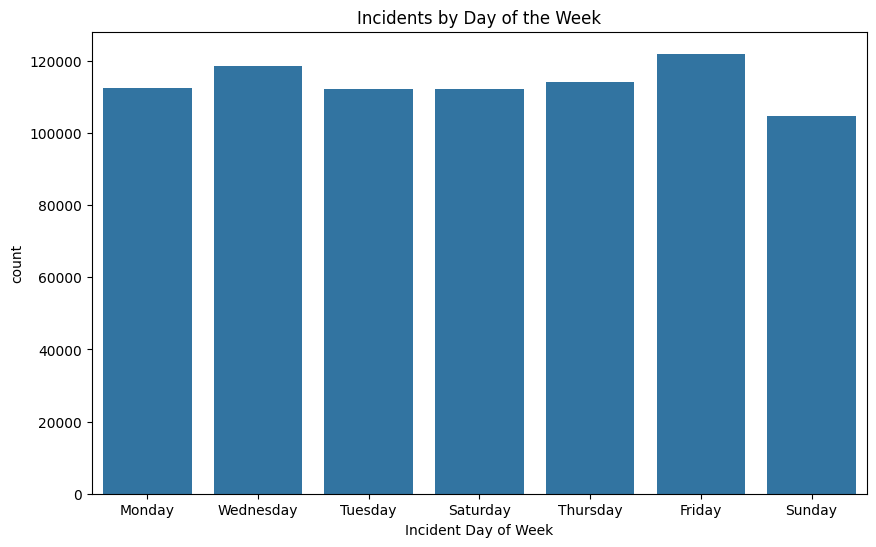

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Incident Day of Week', data=df)
plt.title('Incidents by Day of the Week')
plt.show()

# Preprocessing

## Aggregating By Date

In [7]:
crime_by_date = df.groupby(pd.Grouper(key='Incident Date', freq='D'))
crime_by_date.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
136,2018/01/01 07:00:00 PM,2018-01-01,19:00,2018,Monday,2018/01/01 11:04:00 PM,61992206244,619922,186001451,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1201,2018/01/01 09:00:00 PM,2018-01-01,21:00,2018,Monday,2018/01/02 09:34:00 PM,62107806244,621078,186003281,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17982,2018/01/01 12:00:00 AM,2018-01-01,00:00,2018,Monday,2023/04/17 05:02:00 PM,126662806374,1266628,230267775,231072458.0,...,-122.406636,POINT (-122.40663579982515 37.75616698278188),53.0,NaN,NaN,NaN,3.0,NaN,9.0,3.0
75954,2018/01/01 12:10:00 AM,2018-01-01,00:10,2018,Monday,2018/01/01 12:40:00 AM,61868707041,618687,171051427,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78404,2018/01/01 12:00:00 AM,2018-01-01,00:00,2018,Monday,2023/08/03 11:00:00 AM,130332309024,1303323,230544545,232151125.0,...,-122.391434,POINT (-122.39143433652146 37.773466920607476),34.0,NaN,NaN,NaN,NaN,NaN,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94436,2023/11/24 08:56:00 PM,2023-11-24,20:56,2023,Friday,2023/11/24 09:10:00 PM,133987604134,1339876,230831079,233282318.0,...,-122.411699,POINT (-122.41169923333719 37.78787216759232),50.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0
94437,2023/11/24 03:00:00 PM,2023-11-24,15:00,2023,Friday,2023/11/24 04:39:00 PM,133987106154,1339871,230830598,233281568.0,...,-122.425920,POINT (-122.42592030312977 37.759829612490556),37.0,NaN,NaN,NaN,5.0,NaN,5.0,3.0
94442,2023/11/24 03:24:00 AM,2023-11-24,03:24,2023,Friday,2023/11/24 03:30:00 AM,133970607100,1339706,230829610,233280248.0,...,-122.414919,POINT (-122.41491896442716 37.7482307301352),NaN,NaN,NaN,NaN,3.0,NaN,2.0,3.0
94444,2023/11/24 05:45:00 PM,2023-11-24,17:45,2023,Friday,2023/11/24 08:39:00 PM,133986307021,1339863,230831013,233282129.0,...,-122.491768,POINT (-122.49176789566957 37.74234287583384),40.0,NaN,NaN,NaN,NaN,NaN,7.0,10.0


## Aggregation By Cluster

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

sf_geojson = "SanFrancisco.Neighborhoods.json"
sf_neighborhoods = gpd.read_file(sf_geojson, driver='GeoJSON')

DAYS = 100
def count_crimes_by_neighborhood(date, crimes_group):
    crimes_group = gpd.GeoDataFrame(crimes_group, geometry=gpd.points_from_xy(crimes_group['Longitude'], crimes_group['Latitude']))
    crimes_group.crs = 'EPSG:4326'
    crimes_with_neighborhoods = gpd.sjoin(crimes_group, sf_neighborhoods, how="left", predicate="within")
    counts = crimes_with_neighborhoods.groupby('neighborhood').size()
    # Set count to 0 for neighborhoods with no crimes
    counts = counts.reindex(sf_neighborhoods['neighborhood']).fillna(0).astype(int)
    return pd.DataFrame({'date': date, 'neighborhood': counts.index, 'crime_count': counts.values})

crime_by_cluster = []
counter = 0
map_data = []

for date, crimes_group in crime_by_date:
     # LIMITS THE NUMBER OF DAYS TO PROCESS
    if (counter == DAYS):
        break #
    counter += 1
    counts_df = count_crimes_by_neighborhood(date, crimes_group)
    map = sf_neighborhoods.merge(counts_df, on='neighborhood', how='left')
    map_data.append(map)
    crime_by_cluster.append(counts_df['crime_count'].tolist())

## Time Series Splitting

In [9]:
from sklearn.model_selection import train_test_split

X_train, y_test = train_test_split(crime_by_cluster,  test_size=0.2, random_state=0)

## Dynamic Mode Decomposition

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class DMD:
    def __init__(self, svd_rank=None):
        self.svd_rank = svd_rank
        self.Phi = None
        self.eigenvalues = None
        self.b = None
    
    def fit(self, X):
        """
        Fit the DMD model to the provided data X.
        X should be of shape (n_features, n_samples).
        """
        X1 = X[:, :-1]
        X2 = X[:, 1:]
        
        U, S, Vh = np.linalg.svd(X1, full_matrices=False)
        
        if self.svd_rank is not None:
            U = U[:, :self.svd_rank]
            S = S[:self.svd_rank]
            Vh = Vh[:self.svd_rank, :]
        
        A_tilde = U.conj().T @ X2 @ Vh.conj().T @ np.linalg.inv(np.diag(S))
        self.eigenvalues, W = np.linalg.eig(A_tilde)
        self.Phi = X2 @ Vh.conj().T @ np.linalg.inv(np.diag(S)) @ W
    
    def predict(self, x_init, n_steps):
        """
        Predict the future states given an initial state x_init for n_steps.
        x_init should be of shape (n_features, 1).
        """
        if self.Phi is None or self.eigenvalues is None:
            raise ValueError("The model is not fitted yet.")
        
        if self.b is None:
            self.b = np.linalg.lstsq(self.Phi, x_init, rcond=None)[0]
        
        future_states = []
        for i in range(n_steps):
            future_state = self.Phi @ (self.eigenvalues ** i * self.b)
            future_states.append(future_state)
        
        return np.array(future_states).T

train = np.array(X_train).T

dmd_model = DMD(svd_rank=6)
dmd_model.fit(train)

initial_state = train[:, -1].reshape(-1, 1)
n_future_steps = len(y_test)

future_predictions = dmd_model.predict(initial_state, n_future_steps)
future_predictions = future_predictions.T

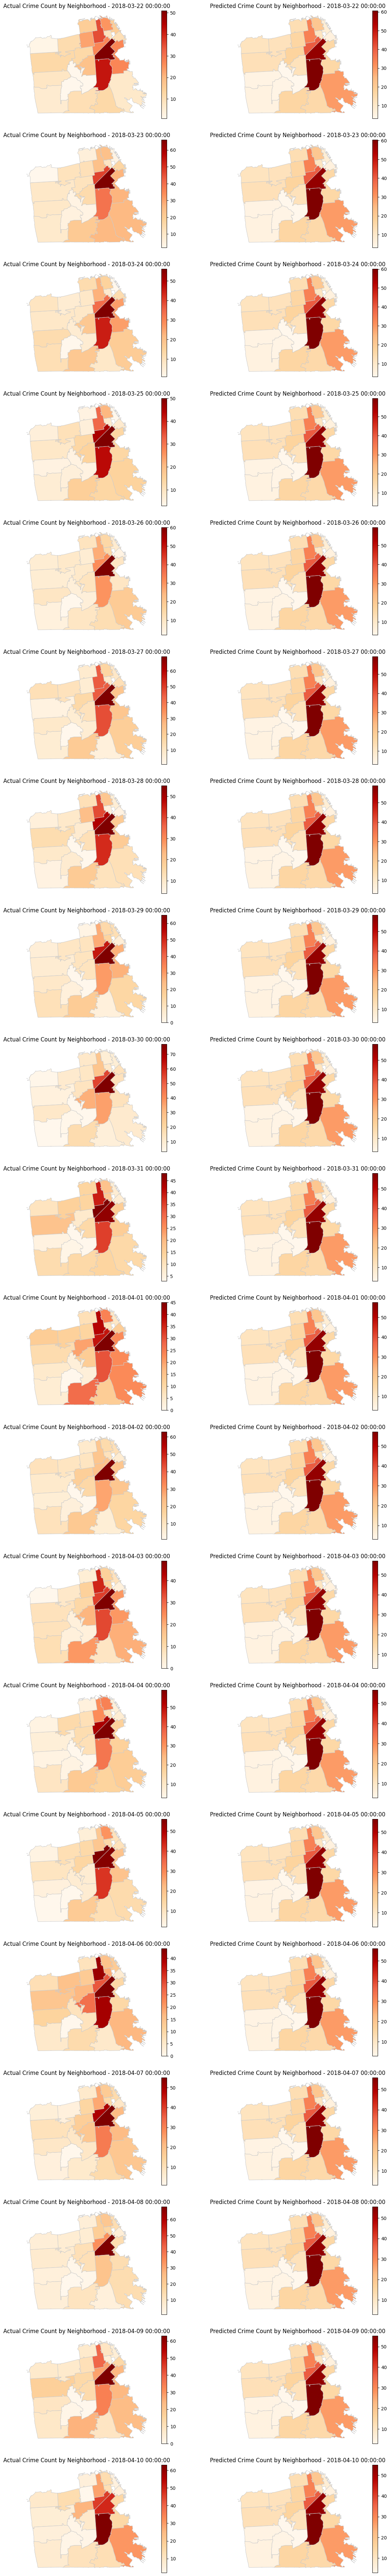

In [11]:
map_data_actual = []
map_data_predicted = []
counter = 0

num_days_to_process = len(y_test)

fig, axs = plt.subplots(num_days_to_process, 2, figsize=(15, num_days_to_process * 5))    
for index, (date, crimes_group) in enumerate(crime_by_date):
    if index < len(X_train):
        continue
    
    # Limits the number of days to process
    if counter == num_days_to_process:
        break
    
    counter += 1
    counts_df = count_crimes_by_neighborhood(date, crimes_group)
    map_actual = sf_neighborhoods.merge(counts_df, on='neighborhood', how='left')
    map_data_actual.append(map_actual)

    counts_df['crime_count'] = future_predictions[index - len(X_train)].real
    map_predicted = sf_neighborhoods.merge(counts_df, on='neighborhood', how='left')
    map_data_predicted.append(map_predicted)
    crime_by_cluster.append(counts_df['crime_count'].tolist())

for i in range(num_days_to_process):
    map_actual = map_data_actual[i]
    ax_actual = axs[i, 0]
    map_actual.plot(column='crime_count', cmap='OrRd', linewidth=0.8, ax=ax_actual, edgecolor='0.8', legend=True)
    ax_actual.set_title('Actual Crime Count by Neighborhood - {}'.format(map_actual['date'].iloc[0]))
    ax_actual.axis('off')

    map_predicted = map_data_predicted[i]
    ax_predicted = axs[i, 1]
    map_predicted.plot(column='crime_count', cmap='OrRd', linewidth=0.8, ax=ax_predicted, edgecolor='0.8', legend=True)
    ax_predicted.set_title('Predicted Crime Count by Neighborhood - {}'.format(map_predicted['date'].iloc[0]))
    ax_predicted.axis('off')

plt.show()

### Evaluation Metrics

In [12]:
def mae(actual, predicted):
  """
  Calculates the Mean Absolute Error between actual and predicted values.

  Args:
      actual: A numpy array of actual values.
      predicted: A numpy array of predicted values.

  Returns:
      The Mean Absolute Error.
  """
  return np.mean(np.abs(actual - predicted))

def mse(actual, predicted):
  """
  Calculates the Mean Squared Error between actual and predicted values.

  Args:
      actual: A numpy array of actual values.
      predicted: A numpy array of predicted values.

  Returns:
      The Mean Squared Error.
  """
  return np.mean((actual - predicted) ** 2)

def rmse(actual, predicted):
  """
  Calculates the Root Mean Squared Error between actual and predicted values.

  Args:
      actual: A numpy array of actual values.
      predicted: A numpy array of predicted values.

  Returns:
      The Root Mean Squared Error.
  """
  return np.sqrt(mse(actual, predicted))

In [23]:
flattened_actual = [item for sublist in crime_by_cluster for item in sublist]
overall_mae = mae(flattened_actual, future_predictions.flatten())
overall_mse = mse(flattened_actual, future_predictions.flatten())
overall_rmse = np.sqrt(overall_mse)

print("Mean Absolute Error: {:.4f}".format(overall_mae))
print("Mean Squared Error: {:.4f}".format(overall_mse.real))
print("Root Mean Squared Error: {:.4f}".format(overall_rmse.real))

Mean Absolute Error: 16.4334
Mean Squared Error: 478.7883
Root Mean Squared Error: 21.8812
